In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
df = pd.read_csv('security_incidents.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Incident ID               3216 non-null   int64  
 1   Year                      3216 non-null   int64  
 2   Month                     3170 non-null   float64
 3   Day                       2902 non-null   float64
 4   Country Code              3182 non-null   object 
 5   Country                   3210 non-null   object 
 6   Region                    2862 non-null   object 
 7   District                  2543 non-null   object 
 8   City                      2354 non-null   object 
 9   UN                        3216 non-null   int64  
 10  INGO                      3216 non-null   int64  
 11  ICRC                      3206 non-null   float64
 12  NRCS and IFRC             3206 non-null   float64
 13  NNGO                      3206 non-null   float64
 14  Other   

In [18]:
df.sort_values("Country", ascending=True, inplace=True)
df.head()


,Incident ID,Year,Month,Day,Country Code,Country,Region,District,City,UN,...,Means of attack,Attack context,Location,Latitude,Longitude,Actor type,Actor name,Details,Verified,Source
1610,1582,2013,9.0,23.0,AF,Afghanistan,Farah,Anar Dara,Dashte Baboos (Anar Dara-Farah Main Road),0,...,Kidnapping,Ambush,Road,32.884819,61.140623,Non-state armed group: National,Unknown,One NGO ambulance driver was kidnapped by AOG ...,Yes,Official Report
1299,1296,2012,4.0,28.0,AF,Afghanistan,Kundoz,Imam Sahib,District Center,0,...,Shooting,Individual attack,Home,37.18897,68.936440,Unaffiliated,Not applicable,An NGO staff member was killed at his private ...,Yes,Official Report
1297,1295,2012,4.0,25.0,AF,Afghanistan,Herat,Guzara,Cotton Factory area,0,...,Bodily assault,Individual attack,Office/compound,34.34817,62.199670,Unknown,Unknown,An IFRC national staff guard was found murdere...,Yes,Official Report
436,435,2006,5.0,12.0,AF,Afghanistan,Herat,NaN,NaN,2,...,Aerial bombardment,Ambush,Road,34.3508273,62.216400,Unknown,Unknown,"1 UN national staff killed, 1 NGO national sta...",Archived,Archived
1294,1284,2012,4.0,15.0,AF,Afghanistan,Ghowr,Chaghcharan,Maidanak,0,...,Kidnapping,Ambush,Road,34.51952,65.250940,Non-state armed group: Unknown,Not applicable,An armed group abducted a female NGO national ...,Yes,Official Report


In [3]:
df.isnull().any()

Incident ID                 False
Year                        False
Month                        True
Day                          True
Country Code                 True
Country                      True
Region                       True
District                     True
City                         True
UN                          False
INGO                        False
ICRC                         True
NRCS and IFRC                True
NNGO                         True
Other                       False
Nationals killed            False
Nationals wounded           False
Nationals kidnapped         False
Total nationals             False
Internationals killed       False
Internationals wounded      False
Internationals kidnapped    False
Total internationals        False
Total killed                False
Total wounded               False
Total kidnapped             False
Total affected              False
Gender Male                 False
Gender Female               False
Gender Unknown

In [4]:
df.dropna(subset=['Country Code', 'Country'], inplace=True)

df.drop(['Month', 'Day','Region','District','City'], axis='columns', inplace=True)

In [5]:
df.isnull().any()

Incident ID                 False
Year                        False
Country Code                False
Country                     False
UN                          False
INGO                        False
ICRC                         True
NRCS and IFRC                True
NNGO                         True
Other                       False
Nationals killed            False
Nationals wounded           False
Nationals kidnapped         False
Total nationals             False
Internationals killed       False
Internationals wounded      False
Internationals kidnapped    False
Total internationals        False
Total killed                False
Total wounded               False
Total kidnapped             False
Total affected              False
Gender Male                 False
Gender Female               False
Gender Unknown              False
Means of attack             False
Attack context              False
Location                    False
Latitude                    False
Longitude     

In [6]:
df.describe()

,Incident ID,Year,UN,INGO,ICRC,NRCS and IFRC,NNGO,Other,Nationals killed,Nationals wounded,...,Internationals kidnapped,Total internationals,Total killed,Total wounded,Total kidnapped,Total affected,Gender Male,Gender Female,Gender Unknown,Longitude
count,3182.000000,3182.000000,3182.000000,3182.000000,3172.000000,3172.000000,3172.00000,3182.000000,3182.000000,3182.000000,...,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,1684.531113,2012.719359,0.368008,0.895663,0.054540,0.116961,0.42024,0.026084,0.600880,0.631678,...,0.096166,0.237901,0.667819,0.706474,0.505343,1.879635,0.958831,0.148334,0.772470,38.985130
std,961.793798,5.797982,1.316839,1.783765,0.431189,0.779266,1.15999,0.226252,1.123485,1.458460,...,0.523744,0.826493,1.215778,1.526034,1.415481,2.218843,1.291231,0.494543,1.946734,29.346921
min,1.000000,1997.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-101.551111
25%,853.250000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,29.166706
50%,1685.500000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,36.374809
75%,2511.750000,2018.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,62.241454
max,3347.000000,2021.000000,46.000000,49.000000,8.000000,18.000000,14.00000,4.000000,17.000000,37.000000,...,9.000000,15.000000,20.000000,37.000000,20.000000,49.000000,17.000000,7.000000,38.000000,179.012274


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028399A88D08>,
      dtype=object)

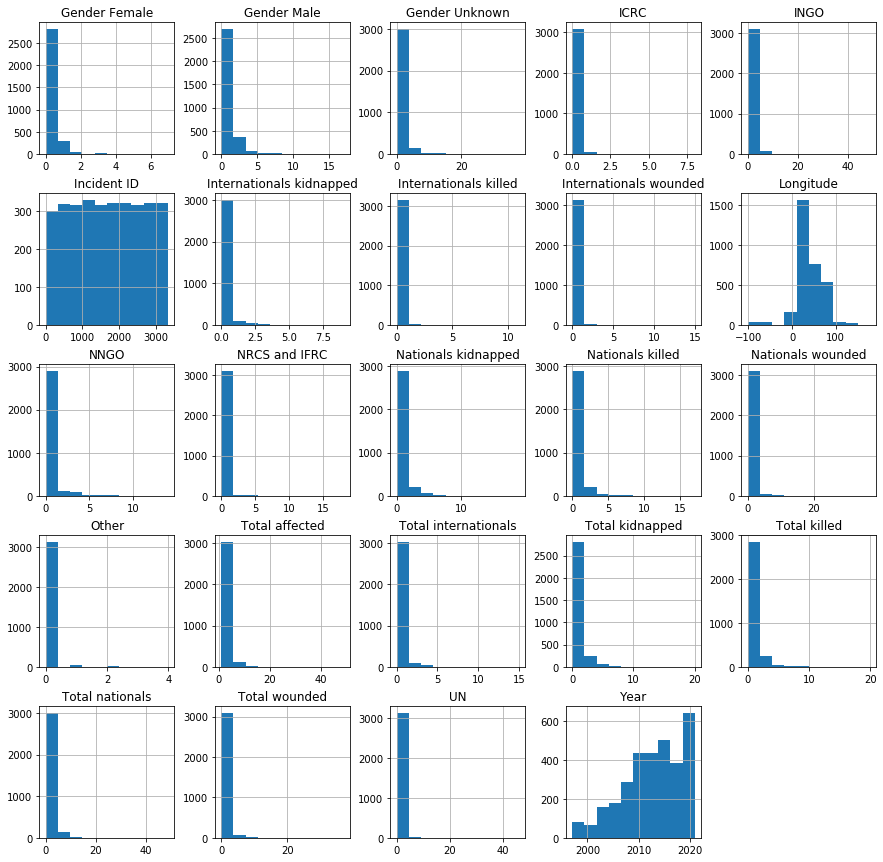

In [7]:
df.hist( figsize=(15,15))

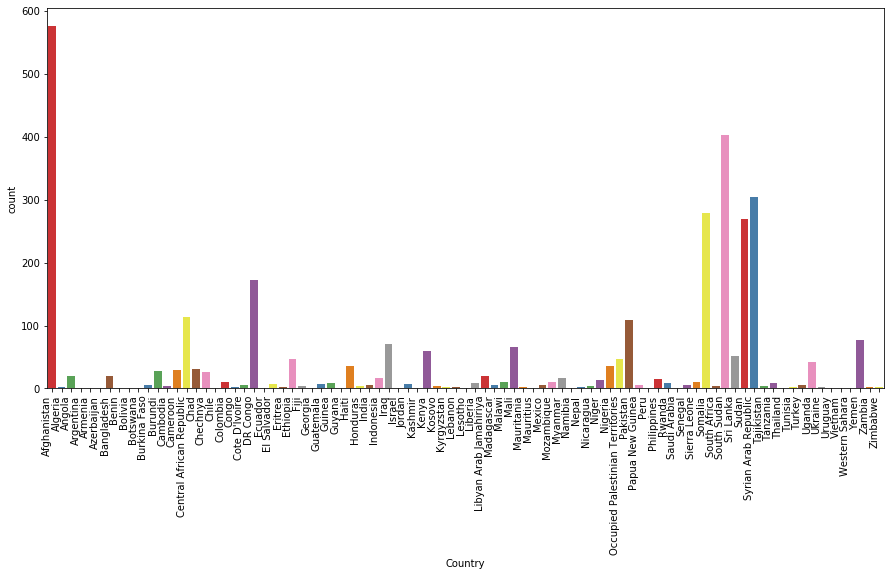

In [26]:
plt.subplots(figsize=(15,7))
ax = sns.countplot(x="Country",  palette='Set1', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
None

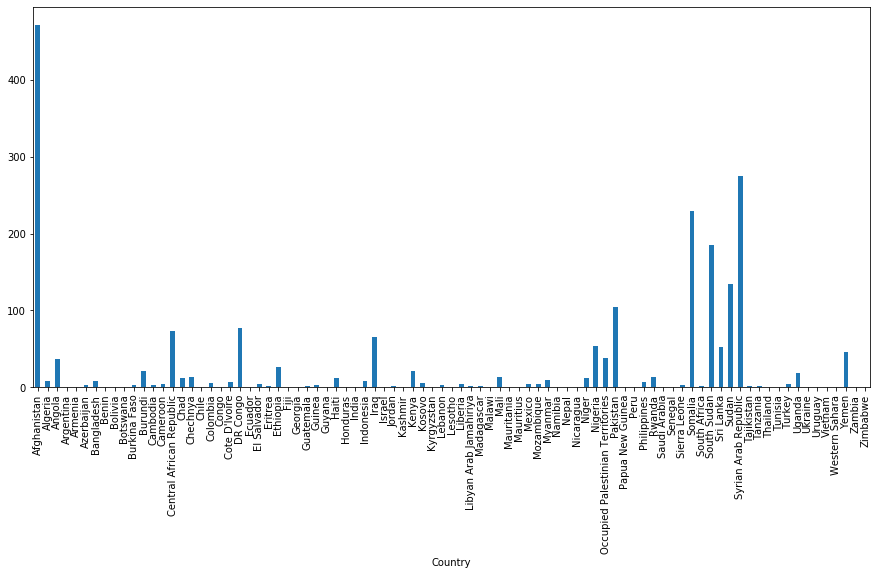

In [22]:
plt.subplots(figsize=(15,7))
df.groupby(["Country"])["Total killed"].sum().plot(kind='bar')

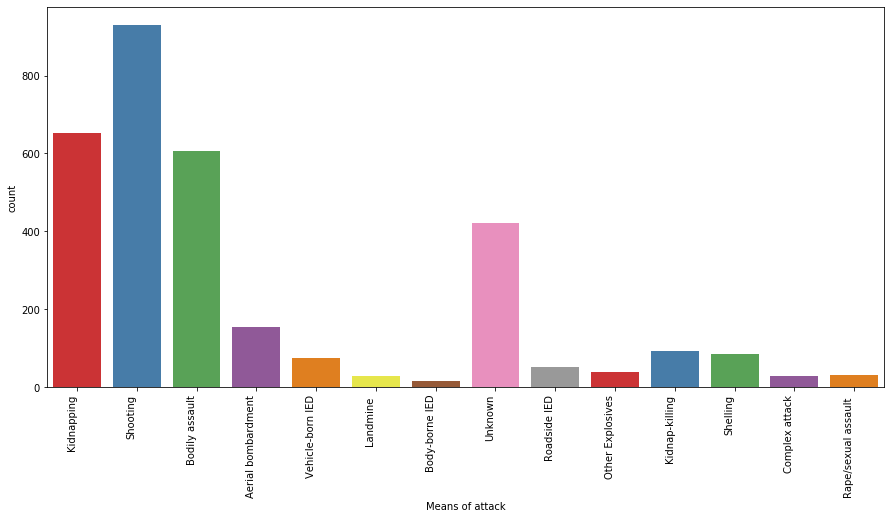

In [20]:
plt.subplots(figsize=(15,7))
ax = sns.countplot(x="Means of attack",  palette='Set1', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
None


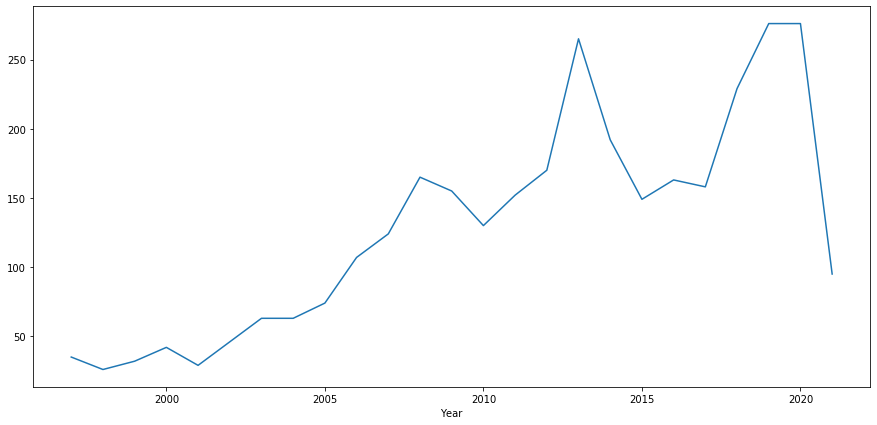

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(["Year"])["Incident ID"].count().plot(ax=ax)

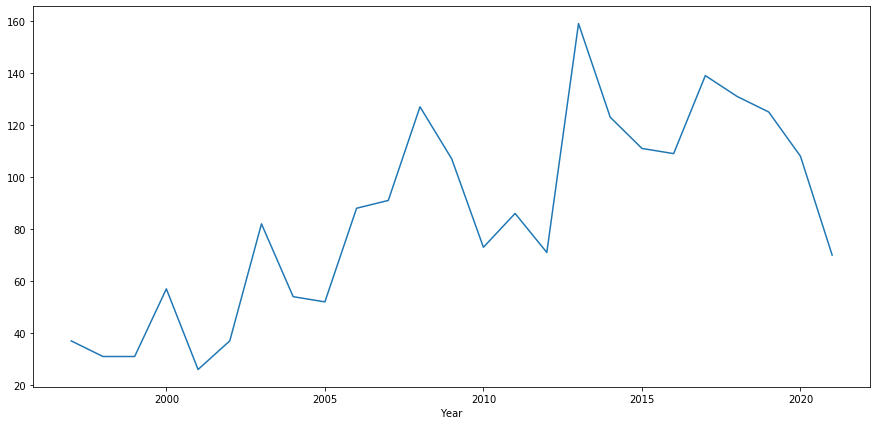

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(["Year"])["Total killed"].sum().plot(ax=ax)

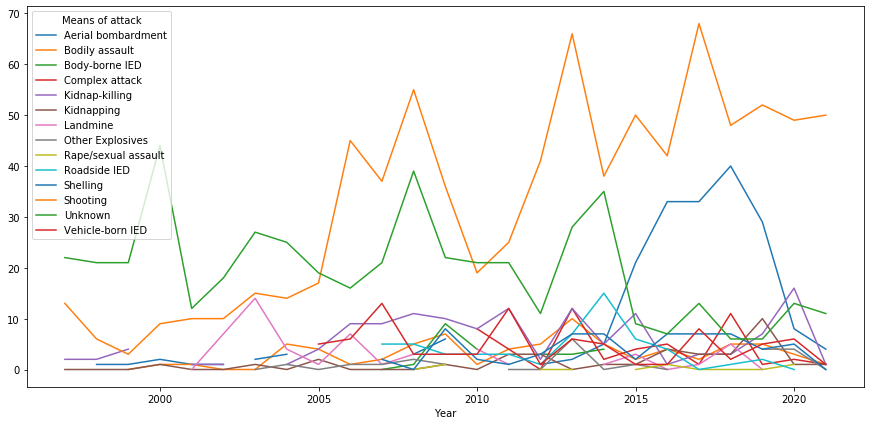

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(["Year","Means of attack"])["Total killed"].sum().unstack().plot(ax=ax)

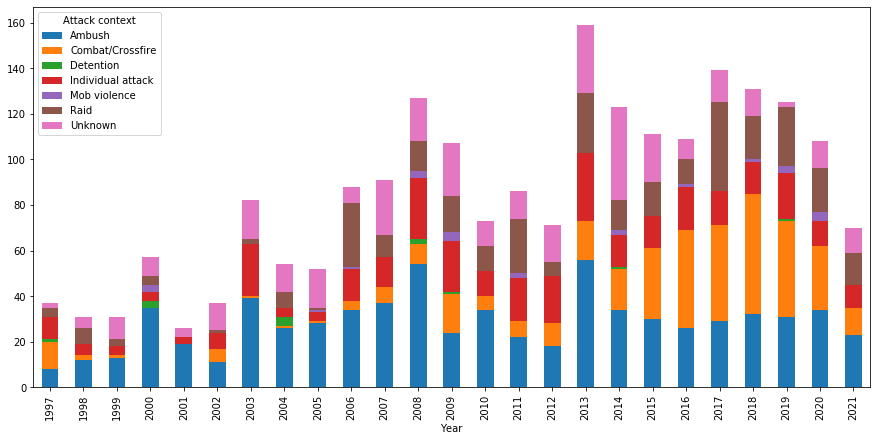

In [14]:

df.groupby(["Year","Attack context"])["Total killed"].sum().unstack().plot(kind='bar', stacked=True, figsize=(15,7))

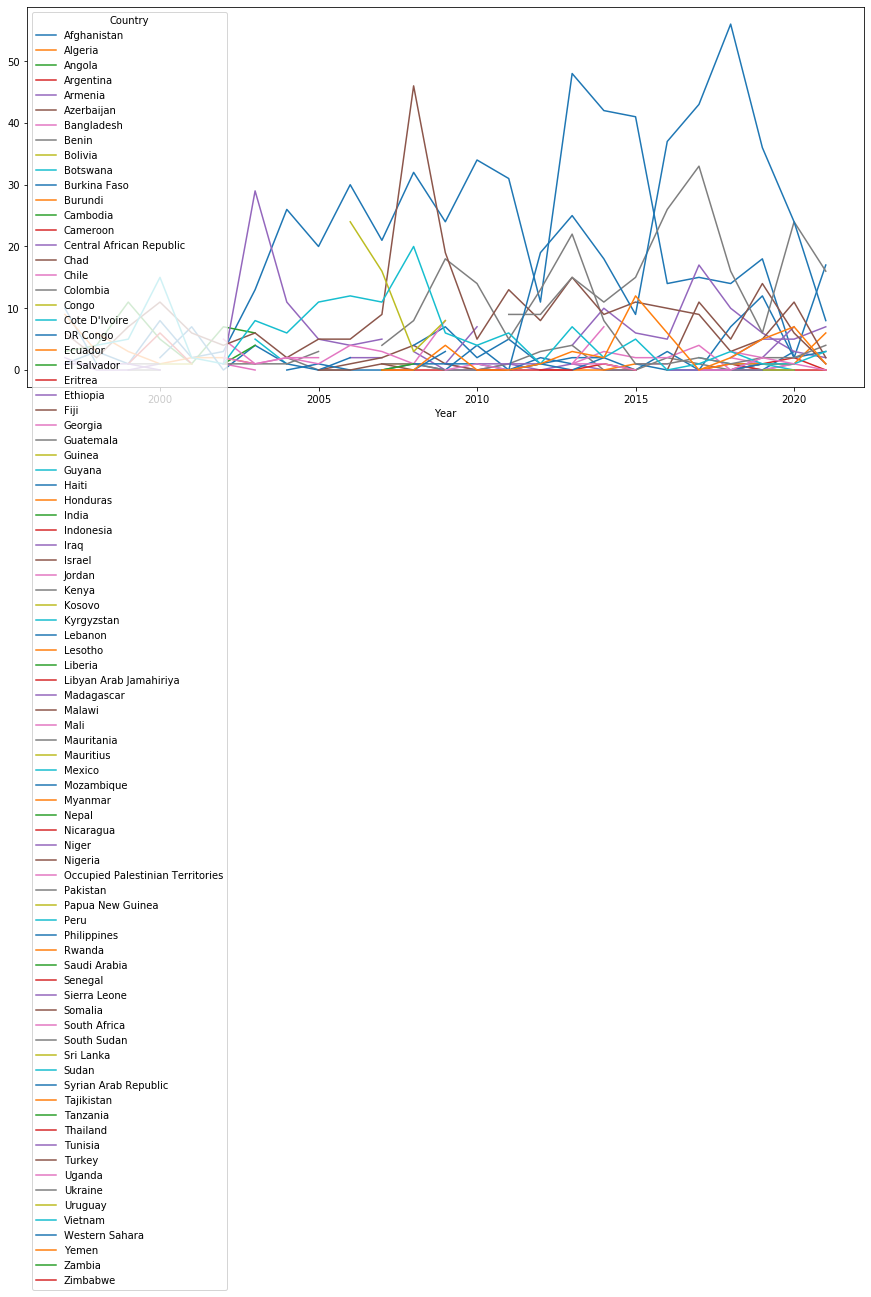

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(["Year","Country"])["Total killed"].sum().unstack().plot(ax=ax)